In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, precision_recall_curve, roc_curve, auc
)

import matplotlib.pyplot as plt

In [11]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    weights=[0.7, 0.3],   # imbalanced dataset
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [13]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"AUC: {auc_score:.3f}")


Precision: 0.806
Recall: 0.771
F1-Score: 0.788
AUC: 0.915


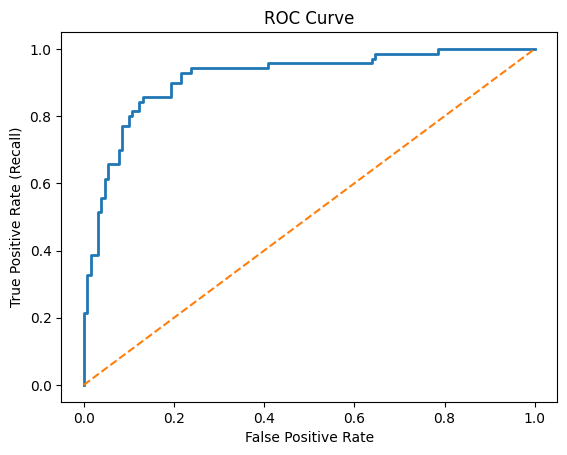

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

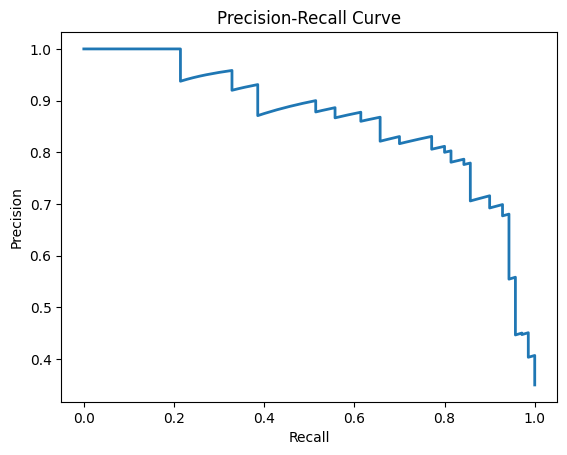

In [15]:
precisions, recalls, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117  13]
 [ 16  54]]


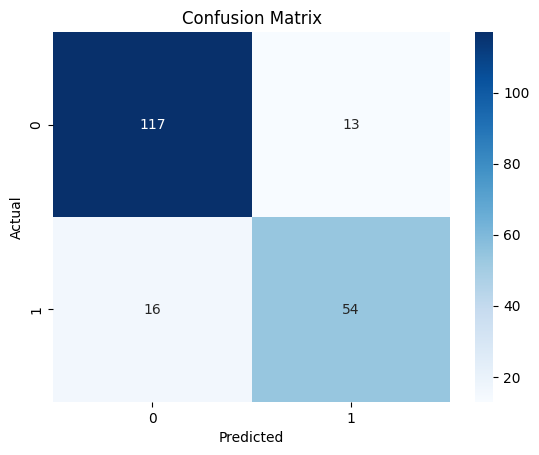

In [17]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       130
           1       0.81      0.77      0.79        70

    accuracy                           0.85       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200

